In [1]:
# Setting grandparent directory
# as an import path.
import os
import sys
grandparent_directory = os.path.join(os.pardir, os.pardir)
sys.path.append(grandparent_directory)

# Application Programming Interface (API)

APIs are used to transport data across the internet. In the world of web development, APIs are commonly used as a backend for websites, returning data to a javascript program which then renders the data with html.

In the world of public data and analytics, APIs serve as a powerful tool for data collection and data transparency. 

[Goverment agencies](https://github.com/public-apis/public-apis#government) commonly have APIs that provide open access to their mountains of public data.

Social Media companies like [Twitter](https://developer.twitter.com/en/docs) and [Reddit](https://www.reddit.com/dev/api/) provide APIs that are frequently used by researchers and marketing firms who are studying public internet behavior.

[Google Maps](https://developers.google.com/maps/documentation/?_ga=2.115432070.1817774719.1607955846-1869916520.1607955812&_gac=1.158970888.1607956052.COHo1IfXze0CFdmUxQIdVrAPYQ) provides an api for creating interactive maps and manipulating geodata. 

[NBA Stats](https://any-api.com/nba_com/nba_com/docs/_playercareerstats) provides open access to league, player, and team data.

The list goes on and on. There is a world of data that is ripe for exploring, and I highly recommend that you search for APIs with data that may pique your interest. You can use website like [Any-API.com](https://any-api.com/) or [public-apis.io](https://public-apis.io/) which host a running list of public APIs. 
>**Tip:** Keep an eye out for "Data" links when navigating websites. Some companies have open APIs but do not promote them. Those links are now apart of your work as data scientists. Paying attention to what data can be sourced and from where is a quick way to dramatically increase the power of your analytics. 

### How do we use APIs?
APIs use https requests. We use these all the time! We oftentimes refer to them as URLs.

**Let's look at an example:**

If we follow the url [https://www.date.nager.at](https://date.nager.at)

We are taken to the homepage for a worldwide holidays website. Normally if we wanted to use this product, we would input information to the webpage manually and sift through the results. But what if we need to run thousands of searches?

Below we import 5 years of S&P Stock Data.

In [2]:
import pandas as pd
data_path = os.path.join(os.pardir, os.pardir, 'data')
datafile_path = os.path.join(data_path, 'all_stocks_5yr.csv')
df = pd.read_csv(datafile_path)
print(f'The dataframe has {df.shape[0]} observations')

The dataframe has 619040 observations


This dataset contains the date, name of company, volume, open, high, low, and closing prices for S&P 500 stocks from 2013-2018.

In [3]:
df.head(3)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL


What if we wanted to create a column called `is_holiday` that marks a 1 if the day is a public holiday and a 0 if the date is not a public holiday?

We would have to do ***a lot*** of clicking. 
![](https://media.giphy.com/media/3ohjVa8iomT5u3NMU8/giphy.gif)


## Fortunately, there is a way that we can automate this process.

### New Packages

For this lesson we will be using two new libraries. 

1. [requests](https://requests.readthedocs.io/en/master/)
2. [json](https://docs.python.org/3/library/json.html)

In [4]:
# Lesson packages
from requests import get
import json

Below is an example of an API request!

In [5]:
url = 'https://date.nager.at/Api/v2/PublicHolidays/2013/us'
get(url)

<Response [200]>

✅ A Response 200 means our request was sucessful! ✅

❌ Let's take a quick look at an unsuccessful response.❌

In [6]:
url = 'https://date.nager.at/Api/v2/PublicHolidays/2013/fake-country'
get(url)

<Response [404]>

**A Response 404 means that the url you are using in your request is not valid.**
![](../../static/404-error.gif)

**How do we access the data from a successful request?**

When working with APIs, the standard object that is sent back is `json` which stands for <u>Javascript Object Notation</u>. Json is a lightweight data structure and is used frequently on the backend of websites. It is also a common filetype when saving complex data to disk. 

To access the json data from an API response, we can call the `.json()` method. 

In [7]:
url = 'https://date.nager.at/Api/v2/PublicHolidays/2013/us'
get(url).json()[:2]

[{'date': '2013-01-01',
  'localName': "New Year's Day",
  'name': "New Year's Day",
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'type': 'Public'},
 {'date': '2013-01-20',
  'localName': 'Inauguration Day',
  'name': 'Inauguration Day',
  'countryCode': 'US',
  'fixed': True,
  'global': False,
  'counties': ['US-DC', 'US-LA', 'US-MD', 'US-VA'],
  'launchYear': None,
  'type': 'Public'}]

**How would we describe the structure of this data?**

> **Sierra's Addition:** a list of dictionaries.

### Let's break down the https request

![annotated request](../../static/request_1.png)

**An important note.**

It is very common with APIs that we need to pass in some sort of unique `ID` or variable name. We usually will not know what this variable name is ahead of time, and we will first have to do some preliminary meta API querying to determine the ID so we can use the ID in our final API query. 

In the above example, the "us" portion of the request url can be considered a unique id. For this API, the unique ids are just the two letter abbreviations countries. But let's pretend for a moment that we do not know this. Let's pretend that we just discovered this API on the internet and would like to use it. 

We can see in the documentation an example request:

![](../../static/request_2.png)

When we see something like "countrycode" as part of the request, the next question we should ask is "what is a country code".

Usually, APIs will provide an endpoint for investigating this sort of meta-data. For this API, they provide an endpoint for checking the available countries:

![](../../static/request_3.png)

In [8]:
url = 'https://date.nager.at/Api/v2/AvailableCountries'
get(url).json()[:15]

[{'key': 'AD', 'value': 'Andorra'},
 {'key': 'AL', 'value': 'Albania'},
 {'key': 'AR', 'value': 'Argentina'},
 {'key': 'AT', 'value': 'Austria'},
 {'key': 'AU', 'value': 'Australia'},
 {'key': 'AX', 'value': 'Åland Islands'},
 {'key': 'BB', 'value': 'Barbados'},
 {'key': 'BE', 'value': 'Belgium'},
 {'key': 'BG', 'value': 'Bulgaria'},
 {'key': 'BJ', 'value': 'Benin'},
 {'key': 'BO', 'value': 'Bolivia'},
 {'key': 'BR', 'value': 'Brazil'},
 {'key': 'BS', 'value': 'Bahamas'},
 {'key': 'BW', 'value': 'Botswana'},
 {'key': 'BY', 'value': 'Belarus'}]

When figuring out how to use an API, sometimes there needs to be a little bit of logic puzzle solving. In this case, the result of the `Available Countries` endpoint was a list of dictionaries. Each dictionary contains 'key' and 'value' keys. It would probably be more clear if 'key' was changed to 'countrycode' to make clear that the data saved to this key is the countrycode, but whoever built this API decided that it was intuitive. 

Ultimately, we could pass in 'AD' as the country code, and receive all the public holidays for Andorra!

In [10]:
url = 'https://date.nager.at/Api/v2/PublicHolidays/2013/ad'
get(url).json()[:2]

[{'date': '2013-01-01',
  'localName': 'Any nou',
  'name': "New Year's Day",
  'countryCode': 'AD',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'type': 'Public'},
 {'date': '2013-03-14',
  'localName': 'Dia de la Constitució',
  'name': 'Constitution Day',
  'countryCode': 'AD',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'type': 'Public'}]

### Quick dog photos intermission using the [dog.ceo api](https://dog.ceo/dog-api/)

In [11]:
from src.apis import random_dog

In [16]:
random_dog()

### End of intermission and into breakout rooms.

**Let's return to our problem of determining if a day in our dataset is a public holiday.**

For this problem, we will only focus on public holidays in the United States.

To collect public holiday data from the API, we need the year and countrycode. 

In the cell below, 
- Define a function called `get_year` that returns the year for each observation in the `date` column. 

In [21]:
df.date[0][:4]

'2013'

In [22]:
# Your code here

def get_year(date):
    return date[:4]

get_year(df.date[2394]) #test function

'2017'

**Cool**

In the cell below
- Define a function called `get_public_holidays` that receives a year and returns the public holidays for that year.
- We are only interested in public holidays for the United States

In [23]:
# Your code here

def get_public_holidays(year):
    url = f'https://date.nager.at/Api/v2/PublicHolidays/{year}/us'
    return get(url).json()

get_public_holidays(2018)

[{'date': '2018-01-01',
  'localName': "New Year's Day",
  'name': "New Year's Day",
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'type': 'Public'},
 {'date': '2018-01-15',
  'localName': 'Martin Luther King, Jr. Day',
  'name': 'Martin Luther King, Jr. Day',
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'type': 'Public'},
 {'date': '2018-02-19',
  'localName': 'Presidents Day',
  'name': "Washington's Birthday",
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'type': 'Public'},
 {'date': '2018-05-28',
  'localName': 'Memorial Day',
  'name': 'Memorial Day',
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'type': 'Public'},
 {'date': '2018-07-04',
  'localName': 'Independence Day',
  'name': 'Independence Day',
  'countryCode': 'US',
  'fixed': False,
  'global': T

## A quick aside

Let's talk about rate limits. For this API, no rate limit is mentioned, but it is common for APIs to limit the number of requests you can make in a given amount of time. 

Let's say for example that we are limited to 3 queries per second. We would want to make sure we include in our code some logic to make sure that we never surpass that limit. Otherwise we risk having our IP address blocked by the API!

In [24]:
from time import sleep
from datetime import datetime

data = []
count = 0
begin = datetime.now()
for year in range(2013, 2018):
    print('Starting timer...')
    print('Making Request...')
    response = get_public_holidays(year)
    count += 1
    end = datetime.now()
    if (end-begin).seconds <=1:
        if count >=1:
            print('Rate limit reached.')
            print('Pausing for 1 second...')
            sleep(1)
            print('Resuming...')
            count = 0
            begin = datetime.now()
            
    data.append(response)

Starting timer...
Making Request...
Rate limit reached.
Pausing for 1 second...
Resuming...
Starting timer...
Making Request...
Starting timer...
Making Request...
Starting timer...
Making Request...
Starting timer...
Making Request...


For this api, it probably makes more sense to collect all of the relevant public holiday data once and then use Python to check if each row in the data is a public holiday by referencing the json data. 

In the cell below
- collect the public holiday data for all years in our dataset. 

In [26]:
# Your code here

years = df.date.apply(get_year).unique()
data = []
for year in years:
    data += get_public_holidays(year)

In [27]:
data

[{'date': '2013-01-01',
  'localName': "New Year's Day",
  'name': "New Year's Day",
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'type': 'Public'},
 {'date': '2013-01-20',
  'localName': 'Inauguration Day',
  'name': 'Inauguration Day',
  'countryCode': 'US',
  'fixed': True,
  'global': False,
  'counties': ['US-DC', 'US-LA', 'US-MD', 'US-VA'],
  'launchYear': None,
  'type': 'Public'},
 {'date': '2013-01-21',
  'localName': 'Martin Luther King, Jr. Day',
  'name': 'Martin Luther King, Jr. Day',
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'type': 'Public'},
 {'date': '2013-02-18',
  'localName': 'Presidents Day',
  'name': "Washington's Birthday",
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'type': 'Public'},
 {'date': '2013-05-27',
  'localName': 'Memorial Day',
  'name': 'Memorial Day',
  'countryCode': 'US',

**Now, create a function called `is_holiday` that receives a date and checks the public holidays data to see if the date is present.**

In the cell below:
- Define the `is_holiday` function that returns a 1 if the date is a holiday and a 0 if the date is not a holiday. 
- Add an `'is_holiday'` column to our dataset.

In [28]:
# Your code here

def is_holiday(date): #using global variable date
    for dictionary in data:
        if date == dictionary['date']:
            return 1
    return 0

In [29]:
df['is_holiday'] = df.date.apply(is_holiday)

In [30]:
df.is_holiday.value_counts()

0    613610
1      5430
Name: is_holiday, dtype: int64

In [31]:
df[df.is_holiday == 1]

,date,open,high,low,close,volume,Name,is_holiday
171,2013-10-14,20.52,20.67,20.26,20.58,3066400,AAL,1
191,2013-11-11,23.25,23.45,23.06,23.27,3508100,AAL,1
422,2014-10-13,31.07,31.39,28.10,28.58,34532913,AAL,1
443,2014-11-11,44.00,44.47,43.32,43.44,11053611,AAL,1
673,2015-10-12,42.59,43.88,42.55,43.84,11443308,AAL,1
...,...,...,...,...,...,...,...,...
618705,2016-10-10,52.00,53.14,52.00,52.69,3119094,ZTS,1
618729,2016-11-11,50.84,50.96,50.13,50.61,3527011,ZTS,1
618775,2017-01-20,53.63,54.39,53.60,53.97,3573514,ZTS,1
618956,2017-10-09,63.81,63.87,63.51,63.73,1257637,ZTS,1


Now let's use the data we just collected.

In the cell below, 

- Create a visualization that plots both the closing price distribution of holiday and non-holiday days. 

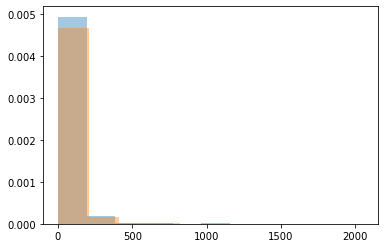

In [36]:
# Your code here

import matplotlib.pyplot as plt

holiday = df[df.is_holiday == 1]
not_holiday = df[df.is_holiday == 0]

plt.hist(holiday.close, density=True, label = 'Holiday', alpha=.4)
plt.hist(not_holiday.close, density=True, label = 'Not Holiday', alpha=.4);

What can we say about this visualization?

**Via Joel** - The distributions look largely the same.

## Saving our json data

To save json data, we can use the `json` package!

In [37]:
file = open('holiday_data.json', 'w') #'w' stands for write
json.dump(data, file)
file.close()

## A quick note about authentification

Not all APIs verify users the same way. You'll notice that the API we used in this lesson doesn't require authentification. Let's look at standard example of how we pass a user token as a header using the [NOAA API](https://www.ncdc.noaa.gov/cdo-web/webservices/v2#gettingStarted)

> **Sierra's Addition:** note that you NEVER want to push your own token key up to Github.

In [67]:
token = None #place your API key here

headers = {'token': token}
url = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/datasets'
get(url, headers=headers)

<Response [200]>

## A quick note about API queries that can receive variable arguments

If we look at the [Datasets Tab](https://www.ncdc.noaa.gov/cdo-web/webservices/v2#datasets) of the NOAA documentation, we can see a request in the examples at the bottom that looks like this...

```https://www.ncdc.noaa.gov/cdo-web/api/v2/datasets?stationid=COOP:310090&stationid=COOP:310184&stationid=COOP:310212```

The notation that is different in this request compared to previous requests is that it uses a `?` followed by a bunch of `variable_name=data` queries. This is a common request technique for complex APIs, especially for government APIs. Ultimately, this sort of notation makes APIs more flexible and allows you to quickly retreive the data that you need. 

> **Sierra's Addition:** see the NOAA documentation above and note this is a fantastic example of how it should look across the board.

## Some API tasks

1. Use the [evilinsult api](https://evilinsult.com/api/#generate-insult-get) to collect a list of 5 evil insults.
2. Dig into the documentation for the [cat-facts](https://alexwohlbruck.github.io/cat-facts/) API to return 10 random cat facts.
3. Use the [official joke api](https://github.com/15Dkatz/official_joke_api) to collect 5 random jokes and post your favorite in slack. *Please do not post anything innappropriate.*
4. Check out the [Tweepy](https://www.tweepy.org/) Python package. It is very cool. 